In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import metrics


In [2]:
data = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
data.shape

(4898, 12)

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
print(data["quality"].unique())

[6 5 7 8 4 3 9]


In [8]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:xlabel='residual sugar'>

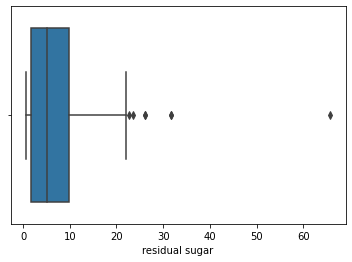

In [10]:
sns.boxplot(x='residual sugar', data=data)

<AxesSubplot:xlabel='fixed acidity'>

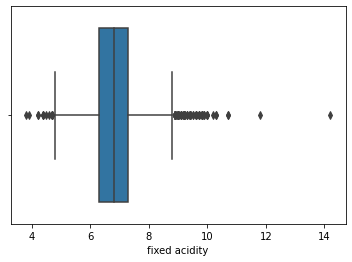

In [11]:
sns.boxplot(x='fixed acidity', data=data)

In [12]:
def removeoutliers(x):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    result = data[~((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr)))]
    return result
data = removeoutliers(data)

<AxesSubplot:xlabel='residual sugar'>

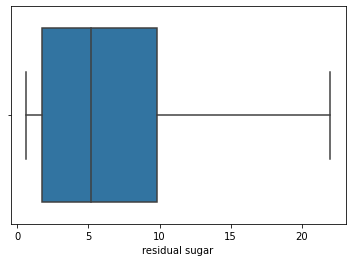

In [13]:
sns.boxplot(x='residual sugar', data=data)

<AxesSubplot:xlabel='fixed acidity'>

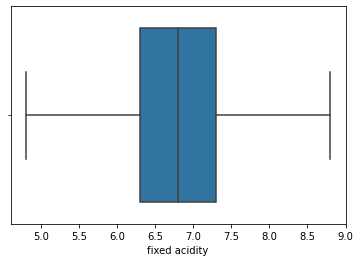

In [14]:
sns.boxplot(x='fixed acidity', data=data)

In [15]:
data.isnull().sum()

fixed acidity           119
volatile acidity        186
citric acid             270
residual sugar            7
chlorides               208
free sulfur dioxide      50
total sulfur dioxide     19
density                   5
pH                       75
sulphates               124
alcohol                   0
quality                 200
dtype: int64

In [16]:
data = data.fillna(data.median())

In [17]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

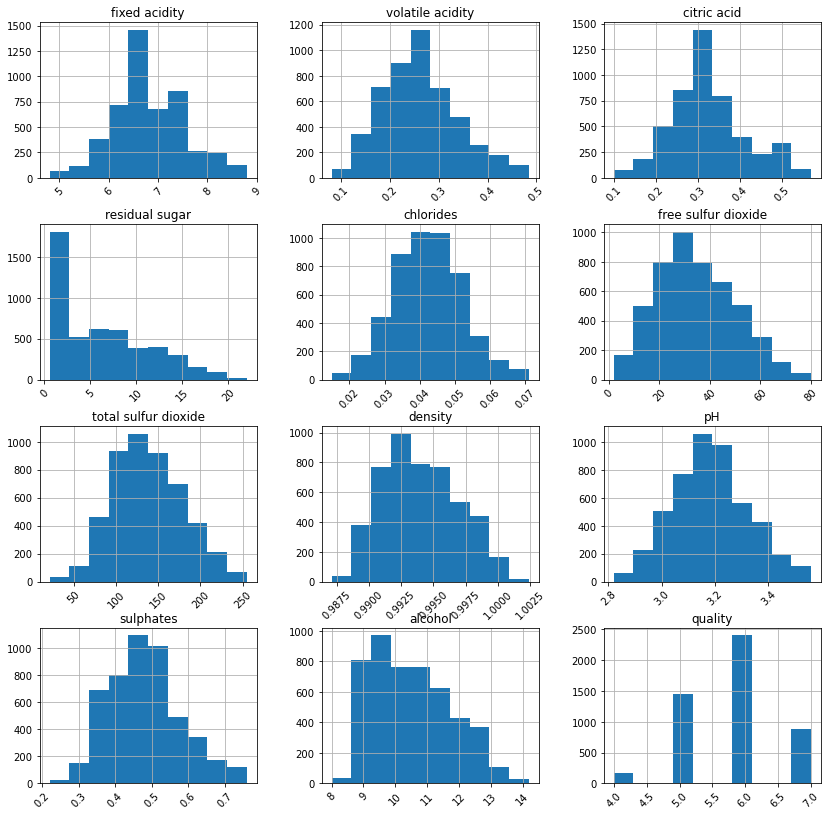

In [18]:
data.hist(figsize=(14,14), xrot=45)
plt.show()

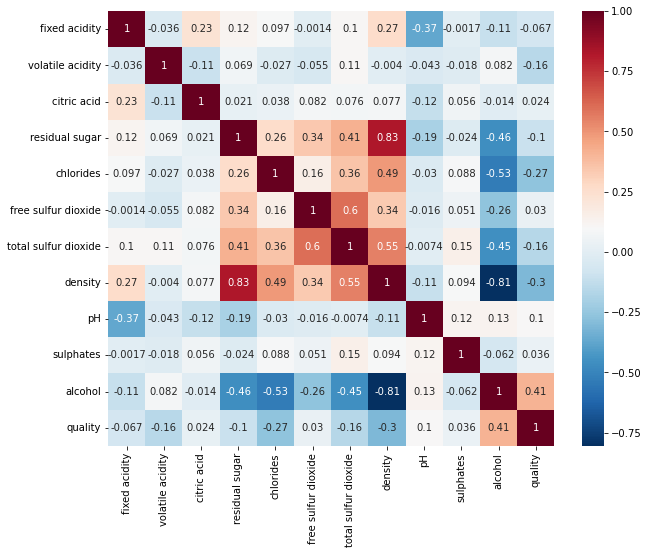

In [19]:
corrs = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

In [20]:
logistic = LogisticRegression()
knearest = KNeighborsClassifier()
tree = DecisionTreeClassifier()

In [21]:
scaler = StandardScaler()

In [22]:
X = scaler.fit_transform(data.drop(["quality"], axis = 1))

In [23]:
y = data['quality']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 24)

Logistic Regression

In [25]:
logistic.fit(X_train, y_train)
lr_pred = logistic.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, lr_pred)))

Accuracy Score = 0.5423623995052567


In [26]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

         4.0       0.17      0.02      0.04        50
         5.0       0.58      0.51      0.54       493
         6.0       0.53      0.79      0.64       770
         7.0       0.46      0.05      0.09       304

    accuracy                           0.54      1617
   macro avg       0.43      0.34      0.33      1617
weighted avg       0.52      0.54      0.49      1617



Decision tree

In [27]:
tree.fit(X_train, y_train)
predictions = tree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.5924551638837353


In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         4.0       0.20      0.26      0.22        50
         5.0       0.59      0.60      0.60       493
         6.0       0.66      0.62      0.64       770
         7.0       0.53      0.55      0.54       304

    accuracy                           0.59      1617
   macro avg       0.49      0.51      0.50      1617
weighted avg       0.60      0.59      0.60      1617



K Nearest Neighbor

In [29]:
knearest.fit(X_train, y_train)
kpred = knearest.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, kpred)))

Accuracy Score = 0.562152133580705


In [30]:
print(classification_report(y_test,kpred))

              precision    recall  f1-score   support

         4.0       0.19      0.12      0.15        50
         5.0       0.56      0.58      0.57       493
         6.0       0.59      0.65      0.62       770
         7.0       0.53      0.39      0.45       304

    accuracy                           0.56      1617
   macro avg       0.47      0.43      0.45      1617
weighted avg       0.56      0.56      0.56      1617



Ensemble Learning

Voting Classifier

In [40]:
voting = VotingClassifier(estimators = [('LR', logistic), ('KNN', knearest), ('DT', tree)], voting = 'soft')

In [31]:
voting.fit(X_train, y_train)
predicted = voting.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         4.0       0.27      0.18      0.22        50
         5.0       0.65      0.62      0.64       493
         6.0       0.65      0.72      0.68       770
         7.0       0.61      0.53      0.57       304

    accuracy                           0.64      1617
   macro avg       0.55      0.51      0.52      1617
weighted avg       0.63      0.64      0.63      1617



Random Forest

In [32]:
rf = RandomForestClassifier()

In [33]:
rf_param = { 
 'max_features': ['auto','sqrt','log2', None],
 'max_depth' : [2,3,4,5,6,7,8],
 'criterion' :['gini', 'entropy']
}

In [34]:
rf_cv = GridSearchCV(rf, cv = 10, param_grid=rf_param, n_jobs = 3)
rf_cv_model = rf_cv.fit(X_train, y_train)


In [35]:
print('Best Parameters using Grid Search: \n', rf_cv.best_params_)

Best Parameters using Grid Search: 
 {'criterion': 'entropy', 'max_depth': 8, 'max_features': None}


AdaBoost

In [36]:
base_estimator = DecisionTreeClassifier(max_depth = 1)
ac = AdaBoostClassifier(base_estimator=base_estimator)
ac_model = ac.fit(X_train, y_train)
ac_pred = ac.predict(X_test)

In [37]:
print(classification_report(y_test, ac_pred))

              precision    recall  f1-score   support

         4.0       0.15      0.20      0.17        50
         5.0       0.56      0.53      0.55       493
         6.0       0.55      0.57      0.56       770
         7.0       0.39      0.36      0.38       304

    accuracy                           0.51      1617
   macro avg       0.41      0.42      0.41      1617
weighted avg       0.51      0.51      0.51      1617



Bagging

In [38]:
bc = BaggingClassifier(base_estimator=base_estimator)
bc.fit(X_train, y_train)
bc_pred = bc.predict(X_test)

In [39]:
print(classification_report(y_test, bc_pred))

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00        50
         5.0       0.49      0.61      0.54       493
         6.0       0.51      0.67      0.58       770
         7.0       0.00      0.00      0.00       304

    accuracy                           0.50      1617
   macro avg       0.25      0.32      0.28      1617
weighted avg       0.39      0.50      0.44      1617

